<div style="background-color: #fefefe ;border: 5px solid #27548A;">
    <header style="; display:flex; padding: 10px 20px">
        <img src="Logo White Background.png" style="width: 200px ; height: 200px ; margin-right: 600px"/>
        <img src="https://ugc.production.linktr.ee/70ae7335-638e-46b4-baff-7e7700847a2f_IMG-20231018-WA0014-1-.jpeg?io=true&size=thumbnail-stack-v1_0" style="width: 200px ; height: 200px"/>
    </header>
    <div style=" padding: 20px ;  border-radius: 5px">
        <h2 style="color: #27548A; font-weight: bold; font-size: 35px; text-decoration: underline ; text-align: center">Hr Analysis DEPI Round 2 Project</h2>
        <div>
            <span style="color: #1E3E62; font-weight: bold; font-size: 28px">Analysis Flow</span>
            <ul>
                <li style="color: #0B192C; font-weight: bold; font-size: 22px ; margin-left: 20px">Importing Libraries & Reading Files</li>
                <li style="color: #0B192C; font-weight: bold; font-size: 22px ; margin-left: 20px">Data Inspection</li>
                <li style="color: #0B192C; font-weight: bold; font-size: 22px ; margin-left: 20px">Data Processing and Cleaning</li>
                <li style="color: #0B192C; font-weight: bold; font-size: 22px ; margin-left: 20px">EDA</li>
            </ul>
        </div> 
    </div>
</div>
<br>


<hr style="border: 5px solid #4f4f4f;">

<div style="padding: 20px;  background-color: #6A42C2 ;border-radius: 5px;">
    <h2 style="color: black;  color: #fff">1- Getting Started</h2>
</div>

<br>
<div style="padding: 10px; border-bottom:5px solid #6A42C2; background-color: #f0f0f0 ;border-radius: 5px">
    <h2 style="color: black; background-color: #f0f0f0">1.1 Importing files</h2>
</div>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyter_dash import JupyterDash
from dash import dcc, html, dash_table, Input, Output
import plotly.express as px
from IPython.display import display, HTML

<div style="padding: 10px; border-bottom:5px solid #6A42C2; background-color: #f0f0f0 ;border-radius: 5px">
    <h2 style="color: black; background-color: #f0f0f0">1.2 Reading Files</h2>
</div>

In [6]:
ANALYSIS_SHEET_PATH = r"C:\Users\Ahmed\Desktop\Depi Final Project\Project round 2\SQL CSV Exports UPDATE\Analysis Sheet Update2 (2).xlsx"
Analysis_Sheets = pd.ExcelFile(ANALYSIS_SHEET_PATH)

# Define the sheet names
sheets = Analysis_Sheets.sheet_names[1:10]
print(sheets)

['Fact_Performance', 'dimworklifebalance', 'dimSelfRating', 'dimManagerRating', 'dimrelationshipsatisfaction', 'dimjobsatisfaction', 'dimenvironmentsatisfaction', 'DimEducationLevel', 'DimEmployee']


In [7]:
# Create the DataFrames

fact_df = pd.read_excel(ANALYSIS_SHEET_PATH, sheet_name= sheets[0])
employee_df = pd.read_excel(ANALYSIS_SHEET_PATH, sheet_name= sheets[8])
rating_df = pd.read_excel(ANALYSIS_SHEET_PATH, sheet_name= sheets[2])
sats_df = pd.read_excel(ANALYSIS_SHEET_PATH, sheet_name= sheets[4])
edu_lvl_df = pd.read_excel(ANALYSIS_SHEET_PATH, sheet_name= sheets[7])

# ensuring the Data is Successfully uploaded
dataFrame_list = [fact_df, employee_df, rating_df, sats_df, edu_lvl_df]
for i in range(0 , 5):
    print(dataFrame_list[i])
    print("*"*20)

     PerformanceID EmployeeID ReviewDate  EnvironmentSatisfaction  \
0             PR01  79F7-78EC 2013-01-02                        5   
1             PR02  B61E-0F26 2013-01-03                        5   
2             PR03  F5E3-48BB 2013-01-03                        3   
3             PR04  0678-748A 2013-01-04                        5   
4             PR05  541F-3E19 2013-01-04                        5   
...            ...        ...        ...                      ...   
6703         PR995  4F28-CFAF 2016-03-14                        5   
6704         PR996  7C80-94E0 2016-03-14                        3   
6705         PR997  8233-2483 2016-03-14                        3   
6706         PR998  8A5B-3D6E 2016-03-15                        5   
6707         PR999  4500-37EB 2016-03-16                        4   

      JobSatisfaction  RelationshipSatisfaction  \
0                   4                         5   
1                   4                         4   
2                 


<hr style="border: 5px solid #4f4f4f;">

<div style="padding: 20px;  background-color: #1278ba ;border-radius: 5px;">
    <h2 style="color: black;  color: #fff">2- Data Inspection</h2>
</div>

<div style="padding: 10px; border-bottom:5px solid #1278ba; background-color: #f0f0f0 ;border-radius: 5px">
    <h2 style="color: black; background-color: #f0f0f0">2.1 Fact Table "Performance Table" </h2>
</div>

In [12]:
fact_df.info()
fact_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6708 entries, 0 to 6707
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   PerformanceID                    6708 non-null   object        
 1   EmployeeID                       6708 non-null   object        
 2   ReviewDate                       6708 non-null   datetime64[ns]
 3   EnvironmentSatisfaction          6708 non-null   int64         
 4   JobSatisfaction                  6708 non-null   int64         
 5   RelationshipSatisfaction         6708 non-null   int64         
 6   TrainingOpportunitiesWithinYear  6708 non-null   int64         
 7   TrainingOpportunitiesTaken       6708 non-null   int64         
 8   WorkLifeBalance                  6708 non-null   int64         
 9   SelfRating                       6708 non-null   int64         
 10  ManagerRating                    6708 non-null   int64      

,count,mean,min,25%,50%,75%,max,std
ReviewDate,6708,2019-04-14 00:30:54.740608512,2013-01-02 00:00:00,2017-05-20 18:00:00,2019-09-14 12:00:00,2021-05-31 06:00:00,2022-12-31 00:00:00,NaN
EnvironmentSatisfaction,6708.0,3.872689,1.0,3.0,4.0,5.0,5.0,0.940711
JobSatisfaction,6708.0,3.430382,1.0,2.0,3.0,4.0,5.0,1.152492
RelationshipSatisfaction,6708.0,3.427251,1.0,2.0,3.0,4.0,5.0,1.156818
TrainingOpportunitiesWithinYear,6708.0,2.013119,1.0,1.0,2.0,3.0,3.0,0.820278
TrainingOpportunitiesTaken,6708.0,1.016995,0.0,0.0,1.0,2.0,3.0,0.950078
WorkLifeBalance,6708.0,3.414431,1.0,2.0,3.0,4.0,5.0,1.143882
SelfRating,6708.0,3.984049,3.0,3.0,4.0,5.0,5.0,0.816493
ManagerRating,6708.0,3.473315,2.0,3.0,3.0,4.0,5.0,0.961788


In [25]:
fact_df.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,2013-01-02,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,2013-01-03,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,2013-01-03,3,4,5,3,2,3,5,4
3,PR04,0678-748A,2013-01-04,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,2013-01-04,5,2,3,1,0,4,4,3


<div style="padding: 10px; border-bottom:5px solid #1278ba; background-color: #f0f0f0 ;border-radius: 5px">
    <h2 style="color: black; background-color: #f0f0f0">2.2 Important Dimension Table "Employee Table"</h2>
</div>

In [16]:
employee_df.info()
employee_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   EmployeeID               1469 non-null   object        
 1   Full Name                1469 non-null   object        
 2   Gender                   1469 non-null   object        
 3   Age                      1469 non-null   int64         
 4   BusinessTravel           1469 non-null   object        
 5   Department               1469 non-null   object        
 6   DistanceFromHome         1469 non-null   int64         
 7   State                    1469 non-null   object        
 8   Ethnicity                1469 non-null   object        
 9   EducationLevelID         1469 non-null   int64         
 10  EducationField           1469 non-null   object        
 11  JobRole                  1469 non-null   object        
 12  MaritalStatus            1469 non-

,count,mean,min,25%,50%,75%,max,std
Age,1469.0,28.99047,18.0,23.0,26.0,34.0,51.0,7.995736
DistanceFromHome,1469.0,22.507828,1.0,12.0,22.0,33.0,45.0,12.81399
EducationLevelID,1469.0,2.912185,1.0,2.0,3.0,4.0,5.0,1.024121
Salary,1469.0,112815.815521,20387.0,43578.0,71198.0,141998.0,547204.0,103237.175445
StockOptionLevel,1469.0,0.794418,0.0,0.0,1.0,1.0,3.0,0.852115
HireDate,1469,2017-07-04 17:35:44.315861248,2012-01-03 00:00:00,2014-07-10 00:00:00,2017-08-31 00:00:00,2020-05-14 00:00:00,2022-12-31 00:00:00,NaN
YearsAtCompany,1469.0,4.56501,0.0,2.0,4.0,7.0,10.0,3.287852
YearsInMostRecentRole,1469.0,2.294078,0.0,0.0,1.0,4.0,10.0,2.539733
YearsSinceLastPromotion,1469.0,3.442478,0.0,1.0,3.0,6.0,10.0,2.945508
YearsWithCurrManager,1469.0,2.24098,0.0,0.0,1.0,4.0,10.0,2.505946


In [28]:
employee_df.head(10)

,EmployeeID,Full Name,Gender,Age,BusinessTravel,Department,DistanceFromHome,State,Ethnicity,EducationLevelID,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,79F7-78EC,Alessandra Storrock,Non-Binary,27,Some Travel,Sales,37,California,White,4,...,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1
1,B61E-0F26,Care Heintze,Male,28,Frequent Traveller,Technology,3,New York,White,3,...,Married,58993,1,Yes,2014-11-07,Yes,7,2,7,1
2,00A3-2445,Wyatt Ziehm,Male,30,Some Travel,Technology,6,California,Black or African American,2,...,Married,126238,0,No,2012-03-08,No,10,3,6,6
3,F5E3-48BB,Zenia Rattery,Female,25,Frequent Traveller,Human Resources,3,California,American Indian or Alaska Native,3,...,Married,23547,0,No,2015-01-13,Yes,3,0,2,1
4,00B0-F199,Trueman Jirasek,Male,23,Some Travel,Sales,35,California,White,1,...,Married,97824,1,Yes,2020-03-16,Yes,1,0,1,0
5,0678-748A,Maurits Farmery,Male,25,Some Travel,Sales,4,California,Native Hawaiian,2,...,Divorced,57698,2,Yes,2015-05-11,Yes,6,5,6,2
6,00D4-DD53,Joyce Goor,Female,30,Frequent Traveller,Technology,44,California,Black or African American,1,...,Single,68508,0,Yes,2012-01-28,Yes,5,4,4,4
7,541F-3E19,Dot Aherne,Female,27,Some Travel,Technology,30,California,White,1,...,Single,49374,0,Yes,2014-04-02,Yes,1,0,0,1
8,00E4-3D60,Sherilyn Girke,Female,30,Frequent Traveller,Technology,37,California,White,1,...,Single,109778,0,No,2022-06-23,Yes,0,0,0,0
9,F93E-BDEF,Rodolfo Askem,Male,43,Some Travel,Technology,17,California,Black or African American,4,...,Single,130848,0,Yes,2014-02-09,No,8,8,8,8


<div style="padding: 10px; border-bottom:5px solid #1278ba; background-color: #f0f0f0 ;border-radius: 5px">
    <h2 style="color: black; background-color: #f0f0f0">2.2 Dataset Dimensions "Education level table" , "Satisfaction and Rating Tables" </h2>
</div>

In [30]:
print("EducationLevel Table")
edu_lvl_df.info()

EducationLevel Table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EducationLevelID  5 non-null      int64 
 1   EducationLevel    5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [31]:
print("Satisfaction Table")
sats_df.info()

Satisfaction Table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   RelSatisfactionID  5 non-null      int64 
 1   SatisfactionLevel  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [32]:
print("Rating Table")
rating_df.info()

Rating Table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SelfRatingID  5 non-null      int64 
 1   RatingLevel   5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [33]:
edu_lvl_df.head()

,EducationLevelID,EducationLevel
0,1,No Formal Qualifications
1,2,High School
2,3,Bachelors
3,4,Masters
4,5,Doctorate


In [34]:
sats_df.head()

,RelSatisfactionID,SatisfactionLevel
0,1,Very Dissatisfied
1,2,Dissatisfied
2,3,Neutral
3,4,Satisfied
4,5,Very Satisfied


In [35]:
rating_df.head()

,SelfRatingID,RatingLevel
0,1,Unacceptable
1,2,Needs Improvement
2,3,Meets Expectation
3,4,Exceeds Expectation
4,5,Above and Beyond


<hr style="border: 5px solid #4f4f4f;">

<div style="padding: 20px;  background: linear-gradient(to right , #16C47F , #16eaD1) ;border-radius: 5px;">
    <h2 style="color: black;  color: #fff">3- Data Cleaning</h2>
</div>

<div style="padding: 10px; border-bottom:5px solid #16C47F; background-color: #f0f0f0 ;border-radius: 5px">
    <h2 style="color: black; background-color: #f0f0f0">3.1 Detecting missing values </h2>
</div>

In [39]:
for i in dataFrame_list:
    print(i.isnull().sum())
    print("**"*20)

PerformanceID                      0
EmployeeID                         0
ReviewDate                         0
EnvironmentSatisfaction            0
JobSatisfaction                    0
RelationshipSatisfaction           0
TrainingOpportunitiesWithinYear    0
TrainingOpportunitiesTaken         0
WorkLifeBalance                    0
SelfRating                         0
ManagerRating                      0
dtype: int64
****************************************
EmployeeID                 0
Full Name                  0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
State                      0
Ethnicity                  0
EducationLevelID           0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany   

<div style="padding: 10px; border-bottom:5px solid #16C47F; background-color: #f0f0f0 ;border-radius: 5px">
    <h2 style="color: black; background-color: #f0f0f0">3.2 Detecting Duplicate Data </h2>
</div>

In [41]:
for i in dataFrame_list:
    print(f"Count of Duplications: {i.duplicated().sum()}")
    print("**"*20)

Count of Duplications: 0
****************************************
Count of Duplications: 0
****************************************
Count of Duplications: 0
****************************************
Count of Duplications: 0
****************************************
Count of Duplications: 0
****************************************


<div style="padding: 10px; border-bottom:5px solid #16C47F; background-color: #f0f0f0 ;border-radius: 5px">
    <h2 style="color: black; background-color: #f0f0f0">3.3 Detecting Outliers</h2>
</div>

In [84]:
# Building the IQR, Upper & Lower Bound Functions

def IQR(first_quartile,third_quartile):
    result = third_quartile - first_quartile
    return result
    
def upper_bound(IQR , Third_quartile):
    return Third_quartile + 1.5  * IQR
     
    
def lower_bound(IQR , First_quartile):
    return  First_quartile - 1.5 * IQR

In [86]:
outlier_indices = []


for role in employee_df["JobRole"].unique():
    print(role)
    role_salaries = employee_df[employee_df["JobRole"] == role]["Salary"]
    print(f"Counts: {employee_df[employee_df["JobRole"] == role].value_counts().sum()}")
    Q1 = role_salaries.quantile(0.25)
    Q3 = role_salaries.quantile(0.75)
    iqr = IQR(Q1, Q3)

    upper_fence = upper_bound(iqr, Q3)
    lower_fence = lower_bound(iqr, Q1)

    print(f"Q1: {Q1}\nQ3: {Q3}\nIQR: {iqr}\nupper fence: {upper_fence}\nlower fence: {lower_fence}")
    
    
    outliers = employee_df[
        (employee_df["JobRole"] == role) & 
        ((employee_df["Salary"] < lower_fence) | (employee_df["Salary"] > upper_fence))
    ].index

    outlier_indices.extend(outliers)
    
    print(outliers)
    print(" ")
    print("**"*20)
    print(" ")

print(len(outlier_indices))


Sales Executive
Counts: 317
Q1: 65010.0
Q3: 140962.0
IQR: 75952.0
upper fence: 254890.0
lower fence: -48918.0
Index([85, 1215], dtype='int64')
 
****************************************
 
Software Engineer
Counts: 281
Q1: 30233.0
Q3: 57327.0
IQR: 27094.0
upper fence: 97968.0
lower fence: -10408.0
Index([281, 308, 534, 618, 1306], dtype='int64')
 
****************************************
 
Machine Learning Engineer
Counts: 146
Q1: 69932.5
Q3: 194454.0
IQR: 124521.5
upper fence: 381236.25
lower fence: -116849.75
Index([], dtype='int64')
 
****************************************
 
Recruiter
Counts: 24
Q1: 26099.0
Q3: 48956.5
IQR: 22857.5
upper fence: 83242.75
lower fence: -8187.25
Index([], dtype='int64')
 
****************************************
 
Data Scientist
Counts: 249
Q1: 32173.0
Q3: 61915.0
IQR: 29742.0
upper fence: 106528.0
lower fence: -12440.0
Index([8, 273, 467, 652, 697], dtype='int64')
 
****************************************
 
Sales Representative
Counts: 81
Q1: 27060.0

In [88]:
import random as rd
employee_df.loc[rd.choice(outlier_indices)]

EmployeeID                           76ED-1CF5
Full Name                        Spenser Pyzer
Gender                                    Male
Age                                         47
BusinessTravel                     Some Travel
Department                          Technology
DistanceFromHome                            12
State                               California
Ethnicity                                White
EducationLevelID                             4
EducationField             Information Systems
JobRole                      Software Engineer
MaritalStatus                           Single
Salary                                  105126
StockOptionLevel                             0
OverTime                                    No
HireDate                   2014-11-21 00:00:00
Attrition                                   No
YearsAtCompany                               8
YearsInMostRecentRole                        0
YearsSinceLastPromotion                      7
YearsWithCurr

In [90]:
# Update the Dataframes by excluding the outliers
removed_ids = employee_df.loc[outlier_indices, "EmployeeID"]
employee_df = employee_df[~employee_df["EmployeeID"].isin(removed_ids)]
fact_df = fact_df[~fact_df["EmployeeID"].isin(removed_ids)]

In [92]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1415 entries, 0 to 1468
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   EmployeeID               1415 non-null   object        
 1   Full Name                1415 non-null   object        
 2   Gender                   1415 non-null   object        
 3   Age                      1415 non-null   int64         
 4   BusinessTravel           1415 non-null   object        
 5   Department               1415 non-null   object        
 6   DistanceFromHome         1415 non-null   int64         
 7   State                    1415 non-null   object        
 8   Ethnicity                1415 non-null   object        
 9   EducationLevelID         1415 non-null   int64         
 10  EducationField           1415 non-null   object        
 11  JobRole                  1415 non-null   object        
 12  MaritalStatus            1415 non-null 

In [94]:
fact_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6398 entries, 0 to 6707
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   PerformanceID                    6398 non-null   object        
 1   EmployeeID                       6398 non-null   object        
 2   ReviewDate                       6398 non-null   datetime64[ns]
 3   EnvironmentSatisfaction          6398 non-null   int64         
 4   JobSatisfaction                  6398 non-null   int64         
 5   RelationshipSatisfaction         6398 non-null   int64         
 6   TrainingOpportunitiesWithinYear  6398 non-null   int64         
 7   TrainingOpportunitiesTaken       6398 non-null   int64         
 8   WorkLifeBalance                  6398 non-null   int64         
 9   SelfRating                       6398 non-null   int64         
 10  ManagerRating                    6398 non-null   int64         
d

<hr style="border: 5px solid #4f4f4f;">

<div style="padding: 20px;  background: linear-gradient(to right ,#3A59D1 , #1A2CCD) ;border-radius: 5px;">
    <h2 style="color: black;  color: #fff">4- EDA</h2>
</div>

<div>
    <h2 style="font-family: 'Roboto', monospace; color: #4574cc">Project Overview</h2>
    <p>This project involves the analysis of employee-related data collected over time, which includes various satisfaction ratings, training activity, and self/manager assessments. The goal is to uncover trends and insights that can inform HR strategies related to employee engagement, development, and retention.</p>
    <h2 style="font-family: 'Roboto', monospace; color: #4574cc">Patterns to analyze in this project</h2>
    <ul>
        <li>Trends in Ratings</li>
        <li>Attrition Patterns</li>
    </ul>    
</div>


<h2 style="font-family: 'Roboto', monospace; text-align: center; margin-bottom: 10px; color: #4574ee">Merging and Grouping DataFrames<h2>
<hr style="border 2px solid #adadadbb">

In [107]:
left_merged_df = pd.merge(employee_df , fact_df , on="EmployeeID" , how="left")

# for i in merged_df.columns:
#     merged_df.rename(columns={i : i.strip()})
# print("done")

left_merged_df.isnull().sum()
left_merged_df.info()
left_merged_df['ReviewDate'] = pd.to_datetime(left_merged_df['ReviewDate'])
left_merged_df['HireDate'] = pd.to_datetime(left_merged_df['HireDate'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6583 entries, 0 to 6582
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   EmployeeID                       6583 non-null   object        
 1   Full Name                        6583 non-null   object        
 2   Gender                           6583 non-null   object        
 3   Age                              6583 non-null   int64         
 4   BusinessTravel                   6583 non-null   object        
 5   Department                       6583 non-null   object        
 6   DistanceFromHome                 6583 non-null   int64         
 7   State                            6583 non-null   object        
 8   Ethnicity                        6583 non-null   object        
 9   EducationLevelID                 6583 non-null   int64         
 10  EducationField                   6583 non-null   object     

<h2 style="font-family: 'Roboto', monospace; text-align: center; margin-bottom: -10px; color: #4574ee">Performance Evaluation Metrics<h2>
    <h3 style="font-family: 'Roboto', monospace; text-align: center; color: #00f">1- Non Evaluated Employees</h3>
<hr style="border 2px solid #adadadbb">

In [110]:
grouped = left_merged_df[left_merged_df["PerformanceID"].notna()].groupby("Full Name").agg({
    "PerformanceID": ['count']
})
average_evaluations = grouped.mean()

non_evaluated_employees = left_merged_df[left_merged_df["PerformanceID"].isna()]
non_evaluated_employees

,EmployeeID,Full Name,Gender,Age,BusinessTravel,Department,DistanceFromHome,State,Ethnicity,EducationLevelID,...,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
6398,001A-8F88,Christy Jumel,Male,22,Some Travel,Technology,40,California,White,4,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,018B-DF1E,Otha Sopper,Female,19,Some Travel,Sales,1,California,White,1,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6400,0375-2F04,Lani Raddenbury,Female,19,No Travel,Sales,38,illinois,White,4,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6401,03D5-622D,Aurora Whate,Female,21,No Travel,Sales,43,California,White,1,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6402,04D3-B8D3,Ann Sivorn,Female,24,Frequent Traveller,Technology,23,New York,White,4,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6578,F9D2-5579,Nancie Storck,Female,21,Frequent Traveller,Technology,17,California,White,2,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6579,FBAF-649F,Mathilda Franchi,Female,19,Some Travel,Technology,33,New York,White,3,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6580,FC2A-4F21,Torre Blazynski,Male,32,Some Travel,Sales,14,California,White,3,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6581,FD1A-92C2,Belvia Dockrell,Female,35,Some Travel,Sales,21,California,White,4,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
round(average_evaluations.sum() , 2)

5.2

In [114]:
non_evaluated_employees.describe()

,Age,DistanceFromHome,EducationLevelID,Salary,StockOptionLevel,HireDate,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
count,185.000000,185.000000,185.000000,185.000000,185.000000,185,185.000000,185.000000,185.000000,185.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,24.291892,23.383784,3.086486,101799.259459,0.843243,2022-04-04 08:41:30.810810880,0.324324,0.172973,0.259459,0.162162,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,1.000000,1.000000,20418.000000,0.000000,2021-06-30 00:00:00,0.000000,0.000000,0.000000,0.000000,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,19.000000,12.000000,3.000000,36677.000000,0.000000,2021-11-27 00:00:00,0.000000,0.000000,0.000000,0.000000,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,21.000000,23.000000,3.000000,58923.000000,1.000000,2022-03-23 00:00:00,0.000000,0.000000,0.000000,0.000000,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,27.000000,35.000000,4.000000,125232.000000,1.000000,2022-08-20 00:00:00,1.000000,0.000000,1.000000,0.000000,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,50.000000,45.000000,5.000000,509261.000000,3.000000,2022-12-31 00:00:00,1.000000,1.000000,1.000000,1.000000,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.612289,12.896695,1.001673,100938.724222,0.879890,NaN,0.469392,0.379250,0.439528,0.369600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


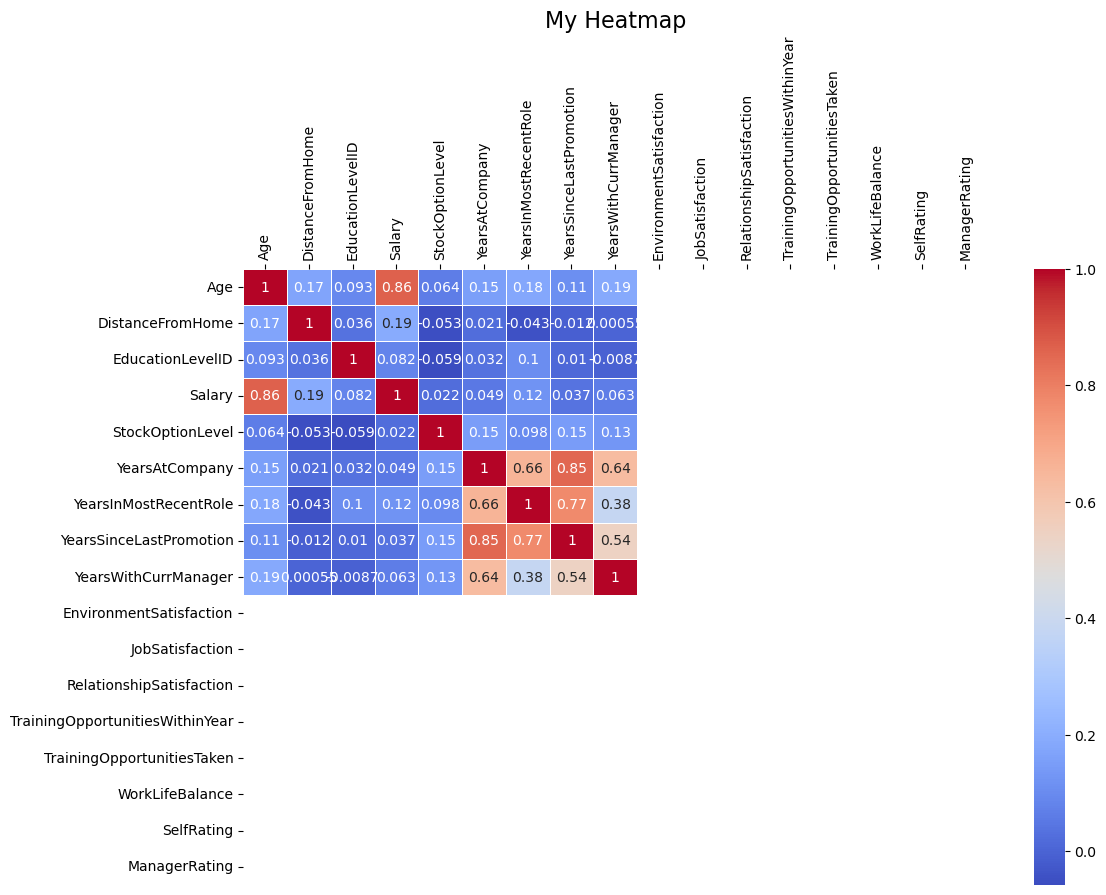

In [116]:
corr = non_evaluated_employees.corr(numeric_only=True)
mask = corr.isnull()

plt.figure(figsize=(12, 8))  # Width=12 inches, Height=8 inches
ax = sns.heatmap(corr , annot=True, cmap='coolwarm', linewidths=0.7 , mask=mask)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.xticks(rotation=90)
plt.title("My Heatmap", fontsize=16)
plt.show()

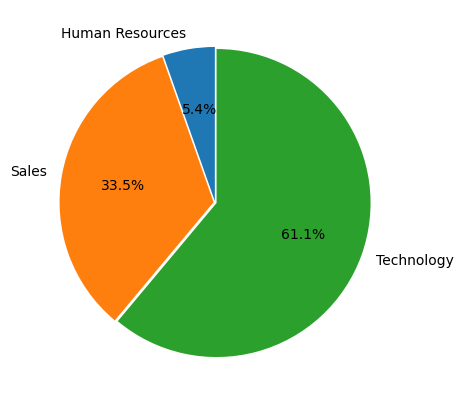

In [117]:
# Non Evaluated Employees Analysis
job_roles = non_evaluated_employees.groupby("Department")
A1 = job_roles.count()
plt.figure(figsize=(5, 5))
plt.pie(x=A1["EmployeeID"], labels=A1.index, autopct='%1.1f%%', startangle=90, explode=[0.01, 0.01, 0.01])
plt.show()

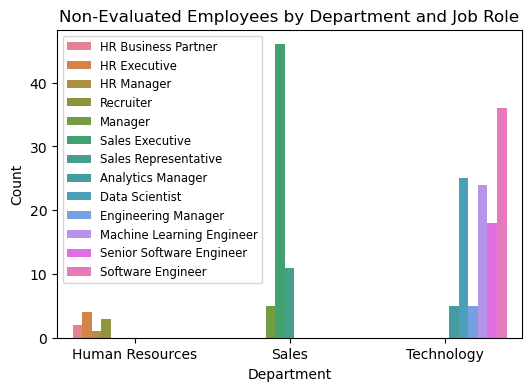

In [118]:
counts = non_evaluated_employees.groupby(['Department', 'JobRole']).size().reset_index(name='Count')

counts
plt.figure(figsize=(6, 4))
sns.barplot(data=counts, x='Department', y='Count', hue='JobRole')
plt.title("Non-Evaluated Employees by Department and Job Role")
plt.xticks(rotation=0)
plt.legend(fontsize="small")
plt.show()

 <h3 style="font-family: 'Roboto', monospace; text-align: center; color: #00f">2- Evaluated Employees</h3>

In [124]:
merged_df = pd.merge(employee_df , fact_df  , how="inner")
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   EmployeeID                       6398 non-null   object        
 1   Full Name                        6398 non-null   object        
 2   Gender                           6398 non-null   object        
 3   Age                              6398 non-null   int64         
 4   BusinessTravel                   6398 non-null   object        
 5   Department                       6398 non-null   object        
 6   DistanceFromHome                 6398 non-null   int64         
 7   State                            6398 non-null   object        
 8   Ethnicity                        6398 non-null   object        
 9   EducationLevelID                 6398 non-null   int64         
 10  EducationField                   6398 non-null   object     

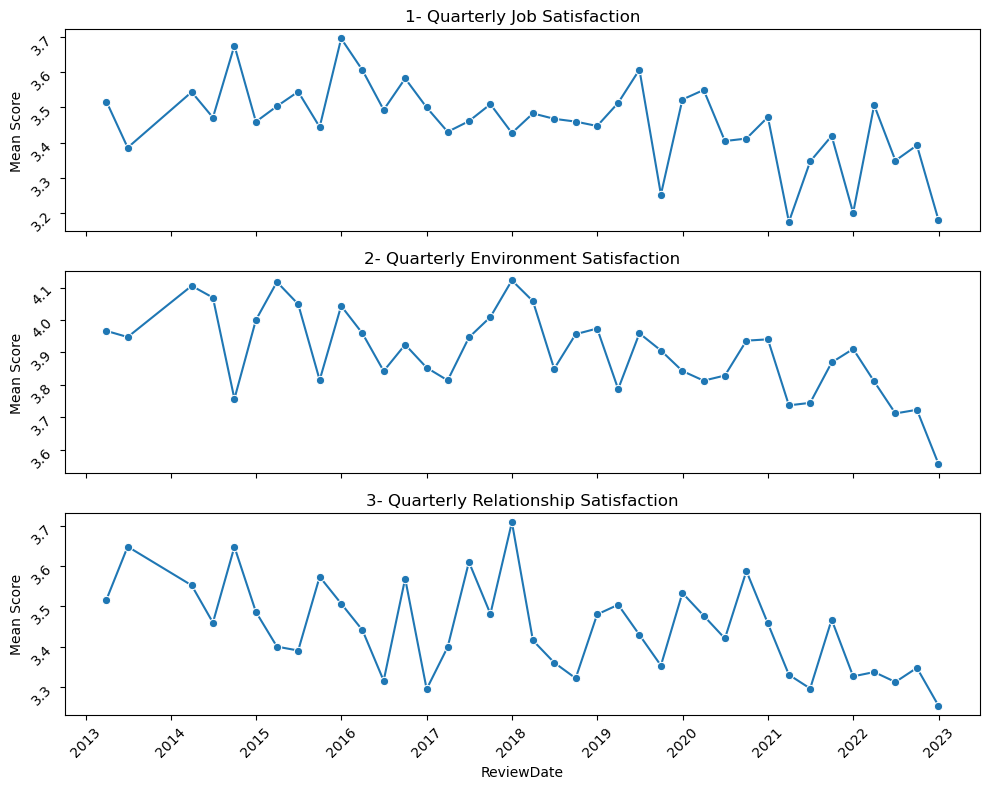

In [126]:

df = merged_df.copy()
df['ReviewDate'] = pd.to_datetime(df['ReviewDate'])
df = df.set_index("ReviewDate")


quarterly = df[["JobSatisfaction", "EnvironmentSatisfaction", "RelationshipSatisfaction"]].resample("QE").mean().reset_index()


fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

sns.lineplot(
    data=quarterly,
    x='ReviewDate',
    y='JobSatisfaction',
    marker='o',
    ax=axes[0]
)
axes[0].set_title("1- Quarterly Job Satisfaction")

sns.lineplot(
    data=quarterly,
    x='ReviewDate',
    y='EnvironmentSatisfaction',
    marker='o',
    ax=axes[1]
)
axes[1].set_title("2- Quarterly Environment Satisfaction")

sns.lineplot(
    data=quarterly,
    x='ReviewDate',
    y='RelationshipSatisfaction',
    marker='o',
    ax=axes[2]
)
axes[2].set_title("3- Quarterly Relationship Satisfaction")

# Final tweaks
for ax in axes:
    ax.set_ylabel("Mean Score")
    ax.tick_params(labelrotation=45)

fig.tight_layout()
plt.show()

<div style="padding: 10px; border-bottom:5px solid #3A59D1; background-color: #f0f0f0 ;border-radius: 5px">
    <h2 style="color: black; text-align: center ">1- Trends in Ratings</h2>
</div>

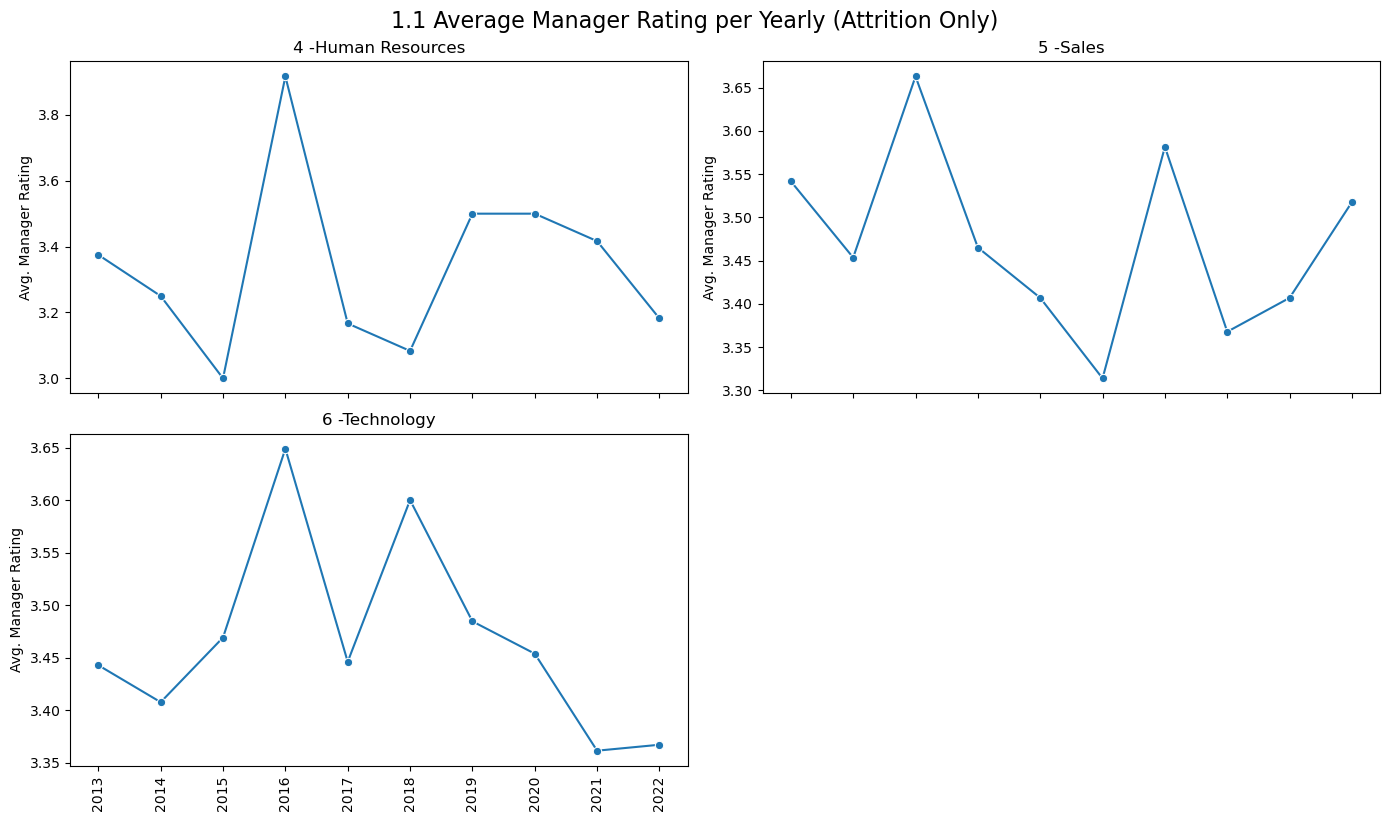

In [129]:
merged_df["ReviewDate"] = pd.to_datetime(merged_df["ReviewDate"])

# Filter for attrition cases
attrition_df = merged_df[merged_df["Attrition"] == "Yes"].copy()

# Create Quarter column
attrition_df["Yearly"] = attrition_df["ReviewDate"].dt.to_period("Y")

# Group by JobRole and Quarter
grouped = (
    attrition_df
    .groupby(["Department", "Yearly"])["ManagerRating"]
    .mean()
    .reset_index()
    .rename(columns={"ManagerRating": "AverageManagerRating"})
)
grouped["Yearly"] = grouped["Yearly"].astype(str)

# Get unique job roles
Departments = grouped["Department"].unique()
n_Departments = len(Departments)

# Plot layout setup
n_cols = 2
n_rows = (n_Departments + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4), sharex=True)
axes = axes.flatten()

# Plot each job role in its own subplot
for i, role in enumerate(Departments):
    role_data = grouped[grouped["Department"] == role]
    sns.lineplot(data=role_data, x="Yearly", y="AverageManagerRating", marker='o', ax=axes[i])
    axes[i].set_title(f"{i + 4} -{role}")
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_ylabel("Avg. Manager Rating")
    axes[i].set_xlabel("")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("1.1 Average Manager Rating per Yearly (Attrition Only)", fontsize=16, y=1.02)
plt.show()

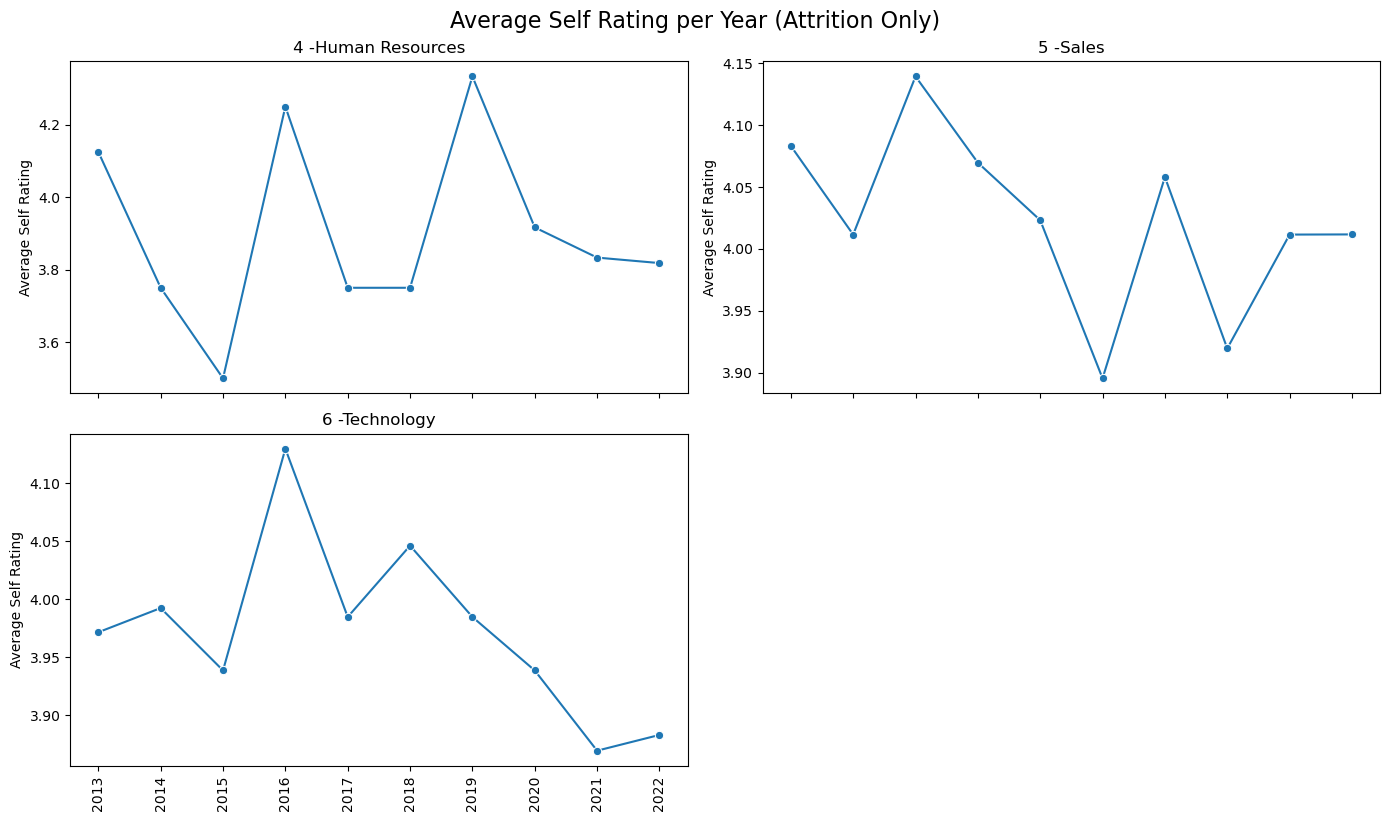

In [130]:
merged_df["ReviewDate"] = pd.to_datetime(merged_df["ReviewDate"])

# Filter for attrition cases
attrition_df = merged_df[merged_df["Attrition"] == "Yes"].copy()

# Create Quarter column
attrition_df["Yearly"] = attrition_df["ReviewDate"].dt.to_period("Y")

# Group by JobRole and Quarter
grouped = (
    attrition_df
    .groupby(["Department", "Yearly"])["SelfRating"]
    .mean()
    .reset_index()
    .rename(columns={"SelfRating": "AverageSelfRating"})
)
grouped["Yearly"] = grouped["Yearly"].astype(str)

# Get unique job roles
Departments = grouped["Department"].unique()
n_Departments = len(Departments)

# Plot layout setup
n_cols = 2
n_rows = (n_Departments + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4), sharex=True)
axes = axes.flatten()

# Plot each job role in its own subplot
for i, role in enumerate(Departments):
    role_data = grouped[grouped["Department"] == role]
    sns.lineplot(data=role_data, x="Yearly", y="AverageSelfRating", marker='o', ax=axes[i])
    axes[i].set_title(f"{i + 4} -{role}")
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_ylabel("Average Self Rating")
    axes[i].set_xlabel("")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Average Self Rating per Year (Attrition Only)", fontsize=16, y=1.02)
plt.show()

Text(0.5, 0, 'Rating')

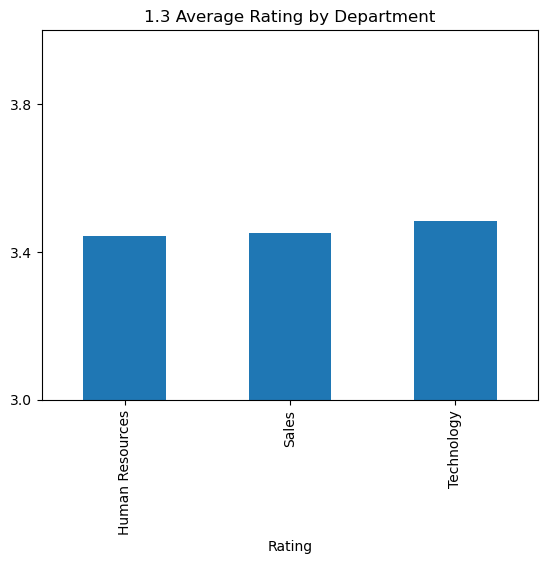

In [133]:
merged_df.groupby('Department')['ManagerRating'].mean().sort_values().plot(kind='bar')
plt.title('1.3 Average Rating by Department')
plt.ylim(3.2, 4)  # Limit y-axis from 3 to 4
plt.yticks(np.arange(3, 4, 0.4))  # Set steps of 0.1
plt.xlabel('Rating')

Text(0.5, 1.0, 'Average Manger Rating by Job Role')

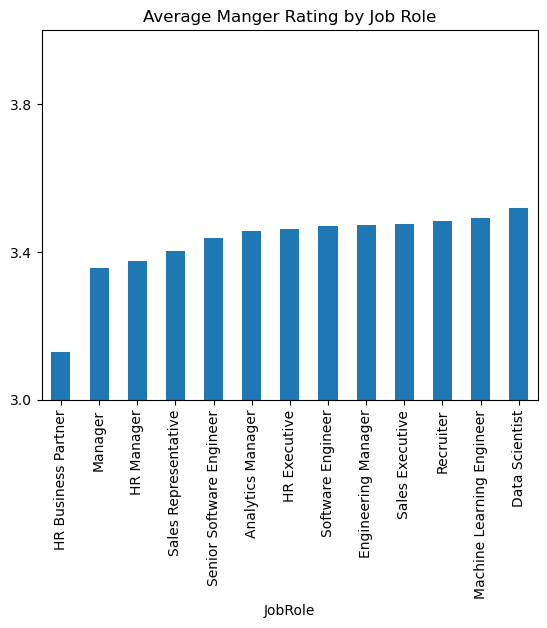

In [134]:
merged_df.groupby('JobRole')['ManagerRating'].mean().sort_values().plot(kind='bar')
plt.ylim(3, 4)  # Limit y-axis from 3 to 4
plt.yticks(np.arange(3, 4, 0.4))  # Set steps of 0.1
plt.title('Average Manger Rating by Job Role')

Text(0.5, 0, 'Rating')

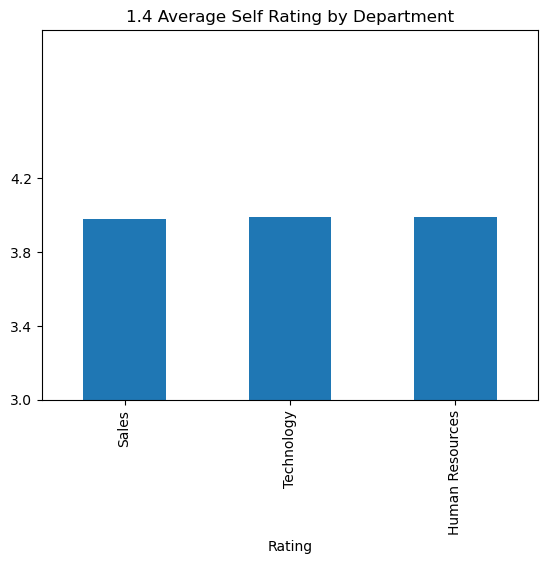

In [137]:
merged_df.groupby('Department')['SelfRating'].mean().sort_values().plot(kind='bar')
plt.title('1.4 Average Self Rating by Department')
plt.ylim(3.2, 5)  # Limit y-axis from 3 to 4
plt.yticks(np.arange(3, 4.5, 0.4))  # Set steps of 0.1
plt.xlabel('Rating')

Text(0.5, 0, 'Rating')

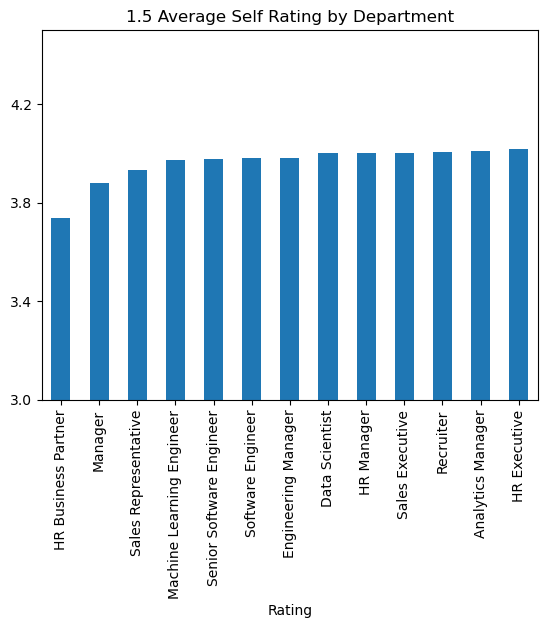

In [139]:
merged_df.groupby('JobRole')['SelfRating'].mean().sort_values().plot(kind='bar')
plt.title('1.5 Average Self Rating by Department')
plt.ylim(3.2, 4.5)  # Limit y-axis from 3 to 4
plt.yticks(np.arange(3, 4.5, 0.4))  # Set steps of 0.1
plt.xlabel('Rating')

<hr>
<div style="font-family: Arial, sans-serif; line-height: 1.6 ;">
    <h2 style="font-family: 'Roboto', sans-serif; font-size: 28px; color: #006A71;"> Rating Trends Insights</h2>
    <h3 style="font-family: 'Roboto', sans-serif; font-size: 20px; color: #B03052; margin-left: 40px"> Uniform Evaluation Culture:</h3>
    <p style="margin-left: 80px;">The narrow rating range implies that the organization might have established consistent guidelines for performance evaluation. This can be beneficial for fairness and transparency.</p>
    <h3 style="font-family: 'Roboto', sans-serif; font-size: 20px; color: #B03052; margin-left: 40px"> Limited Differentiation:</h3>
    <p style="margin-left: 80px;">The low variation may indicate rating compression, where scores cluster around the average. This could hinder the ability to clearly distinguish high performers from average ones.</p>
    <h3 style="font-family: 'Roboto', sans-serif; font-size: 20px; color: #B03052; margin-left: 40px"> Potential Rater Bias:</h3>
    <p style="margin-left: 80px;">The trend might be influenced by leniency bias, where managers avoid giving low ratings even when warranted, possibly to maintain harmony or avoid conflict.</p>
    <h2 style="font-family: 'Roboto', sans-serif; font-size: 28px; color: #006A71;">Recommendations</h2>
    <h3 style="font-family: 'Roboto', sans-serif; font-size: 20px; color: #B03052; margin-left: 40px"> HR Actionable Step:</h3>
    <p style="margin-left: 80px;">Introduce calibration workshops or manager training sessions to ensure ratings reflect actual performance and align with organizational goals.</p>
    
</div>




<div style="padding: 10px; border-bottom:5px solid #3A59D1; background-color: #f0f0f0 ;border-radius: 5px">
    <h2 style="color: black; text-align: center ">2- Attrition Patterns</h2>
</div>

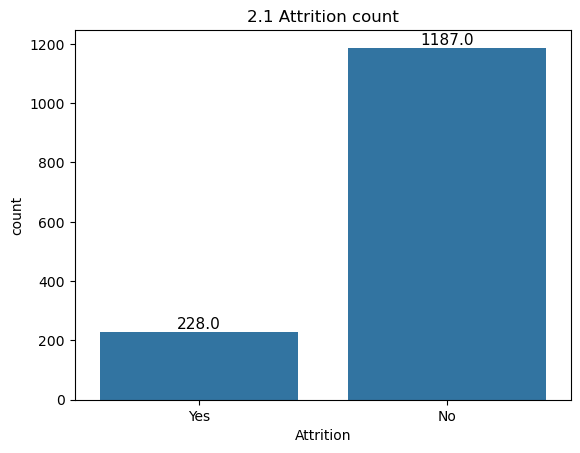

In [143]:
Attrition_Count = sns.countplot(x=employee_df.Attrition)

for p in Attrition_Count.patches:
    height = p.get_height()
    Attrition_Count.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=11)
plt.title("2.1 Attrition count")
plt.show()

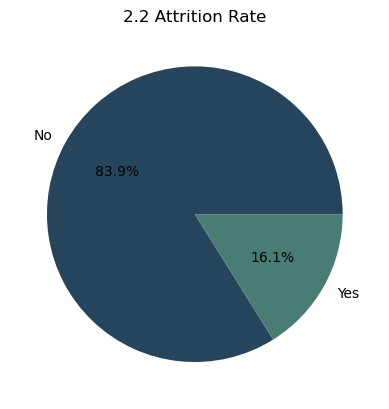

In [145]:
attrition_counts = employee_df['Attrition'].value_counts()
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', colors=['#27445D','#497D74'])
plt.title('2.2 Attrition Rate')
plt.show()

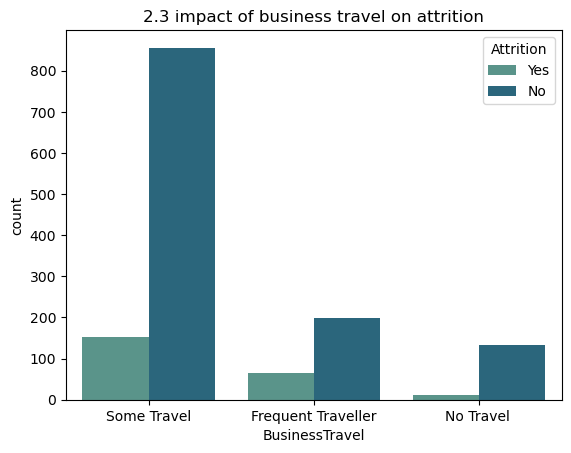

In [147]:
sns.countplot(hue=employee_df.Attrition , x=employee_df.BusinessTravel,palette="crest")
plt.title("2.3 impact of business travel on attrition")
plt.show()

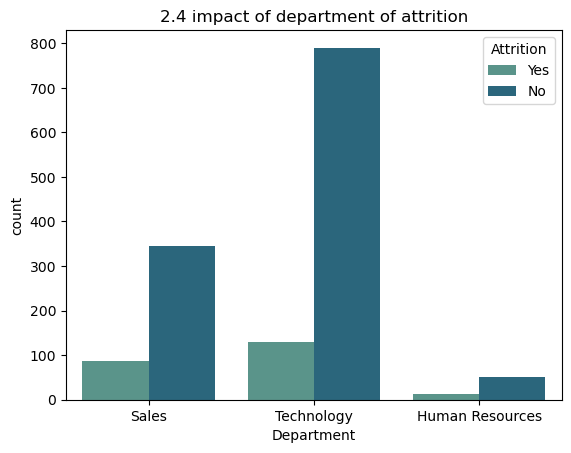

In [149]:
sns.countplot(hue=employee_df.Attrition , x=employee_df.Department,palette="crest")
plt.title("2.4 impact of department of attrition")
plt.show()

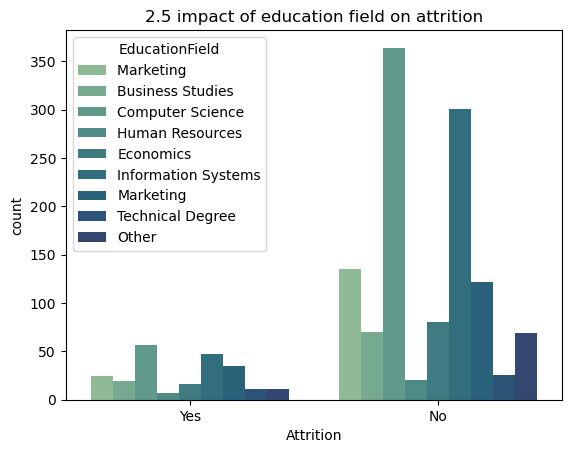

In [151]:
sns.countplot(x=employee_df.Attrition , hue=employee_df.EducationField, palette="crest")
plt.title("2.5 impact of education field on attrition")
plt.show()

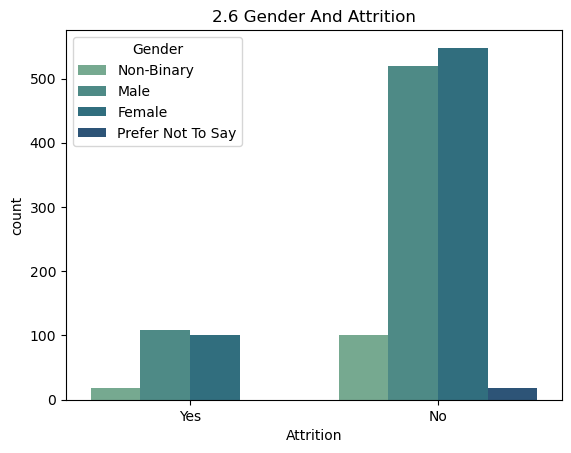

In [153]:
sns.countplot(x=employee_df.Attrition , hue=employee_df.Gender, palette="crest")
plt.title("2.6 Gender And Attrition")
plt.show()

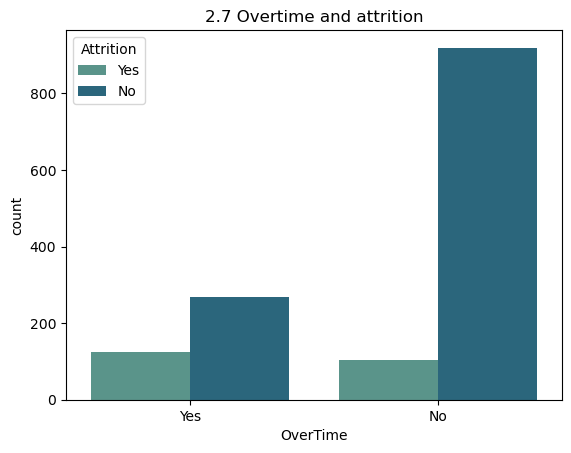

In [155]:
sns.countplot(hue=employee_df.Attrition , x=employee_df.OverTime, palette="crest")
plt.title("2.7 Overtime and attrition")
plt.show()

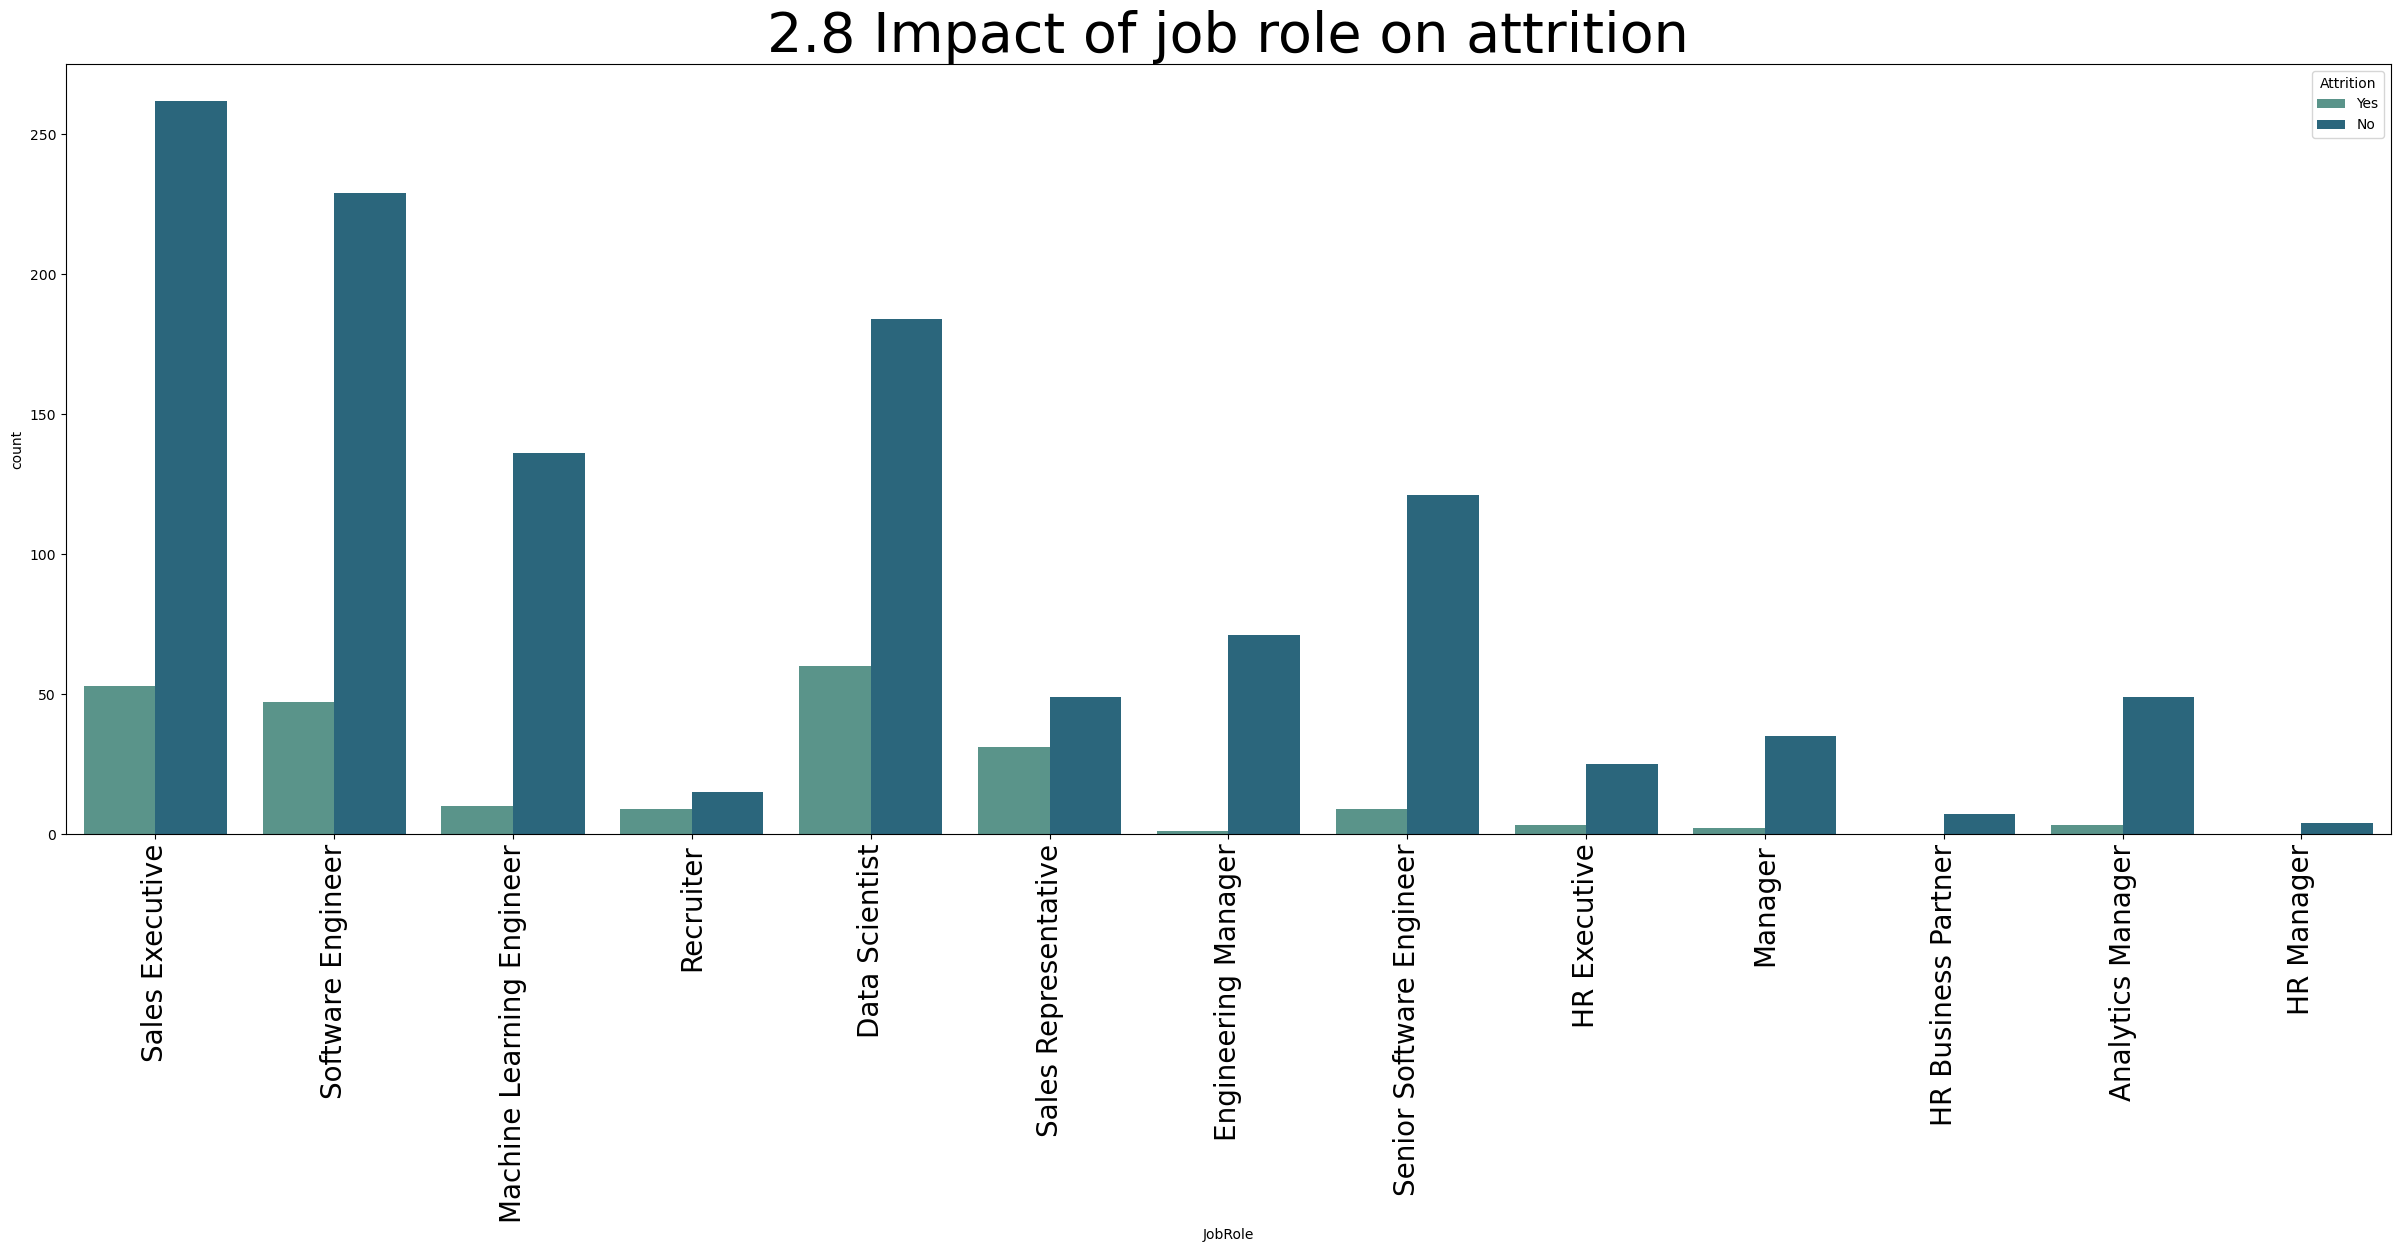

In [157]:
plt.figure(figsize=(30,10))
sns.countplot(hue=employee_df.Attrition , x=employee_df.JobRole, palette="crest")
plt.title("2.8 Impact of job role on attrition" , fontsize=40)
plt.xticks(fontsize=20 , rotation=90)
plt.show()

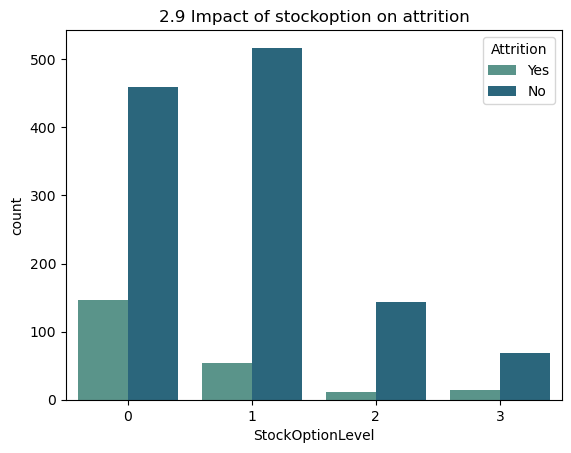

In [159]:
sns.countplot(x=employee_df.StockOptionLevel, hue=employee_df.Attrition , palette="crest")
plt.title("2.9 Impact of stockoption on attrition")
plt.show()

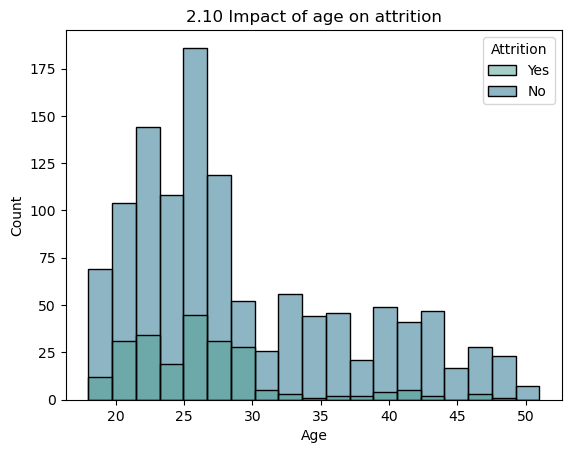

In [161]:
sns.histplot(hue=employee_df.Attrition , x=employee_df.Age, palette="crest")
plt.title("2.10 Impact of age on attrition")
plt.show()

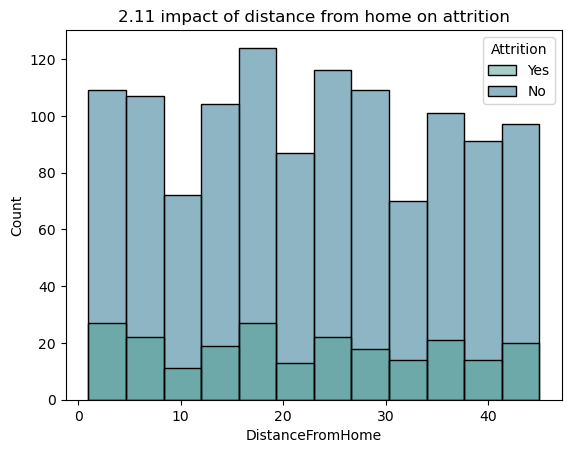

In [163]:
sns.histplot(hue=employee_df.Attrition , x=employee_df.DistanceFromHome, palette="crest")
plt.title("2.11 impact of distance from home on attrition")
plt.show()

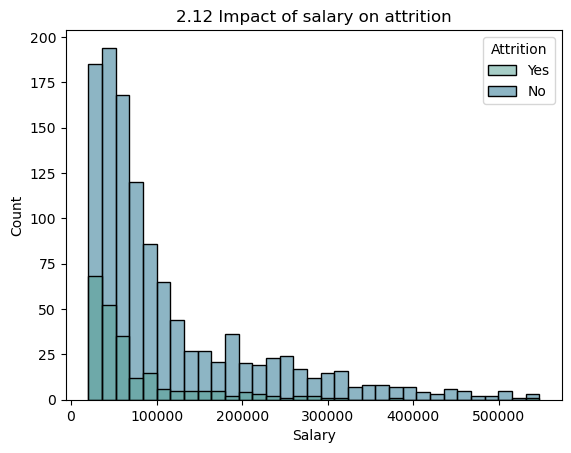

In [165]:
sns.histplot(hue=employee_df.Attrition , x=employee_df.Salary, palette="crest")
plt.title("2.12 Impact of salary on attrition")
plt.show()

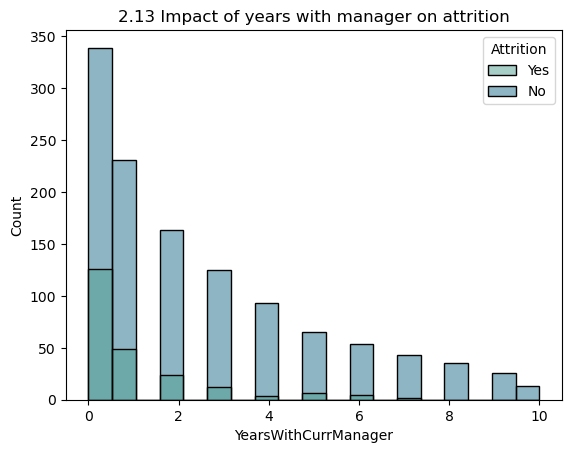

In [167]:
sns.histplot(hue=employee_df.Attrition , x=employee_df.YearsWithCurrManager, palette="crest")
plt.title("2.13 Impact of years with manager on attrition")
plt.show()

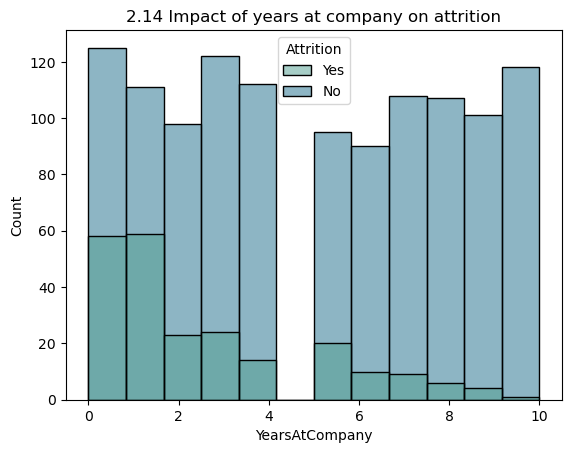

In [169]:
sns.histplot(x=employee_df.YearsAtCompany, hue=employee_df.Attrition , palette="crest")
plt.title("2.14 Impact of years at company on attrition")
plt.show()

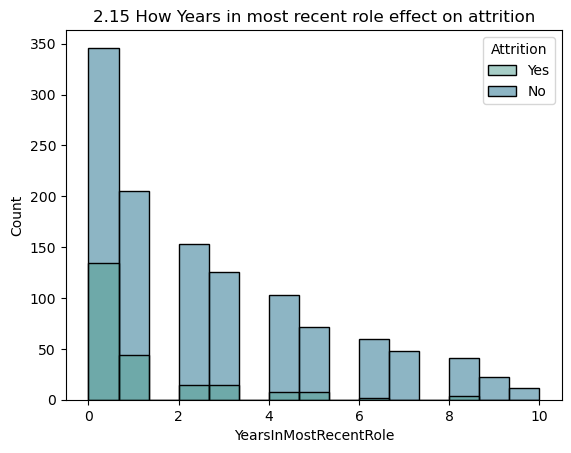

In [171]:
sns.histplot(x=employee_df.YearsInMostRecentRole, hue=employee_df.Attrition , palette="crest")
plt.title("2.15 How Years in most recent role effect on attrition")
plt.show()

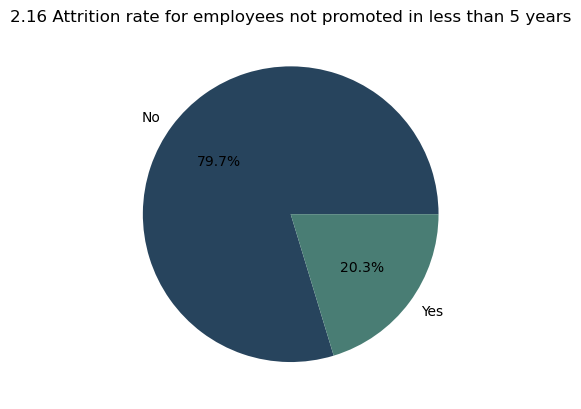

In [173]:
promotion_stagnation = employee_df[employee_df['YearsSinceLastPromotion'] <= 5]['Attrition'].value_counts(normalize=True) * 100

plt.pie(promotion_stagnation , labels=attrition_counts.index , autopct='%1.1f%%' , colors=['#27445D','#497D74'])
plt.title('2.16 Attrition rate for employees not promoted in less than 5 years')
plt.show()

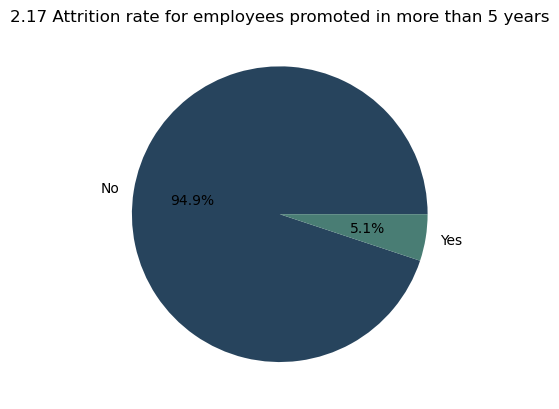

In [175]:
promotion_stagnation = employee_df[employee_df['YearsSinceLastPromotion'] >= 5]['Attrition'].value_counts(normalize=True) * 100

plt.pie(promotion_stagnation , labels=attrition_counts.index , autopct='%1.1f%%' , colors=['#27445D','#497D74'])
plt.title('2.17 Attrition rate for employees promoted in more than 5 years')
plt.show()

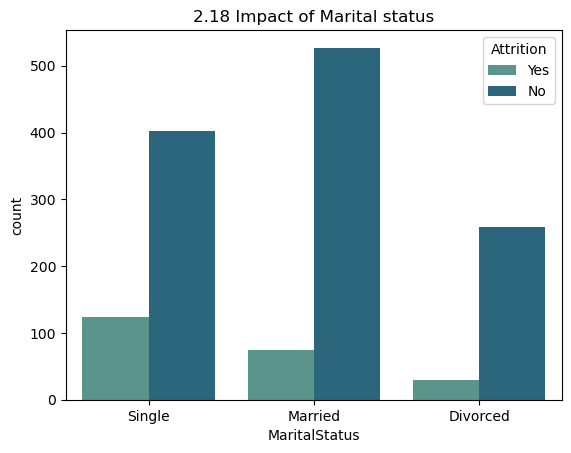

In [177]:
sns.countplot(x=employee_df.MaritalStatus, hue=employee_df.Attrition , palette="crest")
plt.title("2.18 Impact of Marital status")
plt.show()

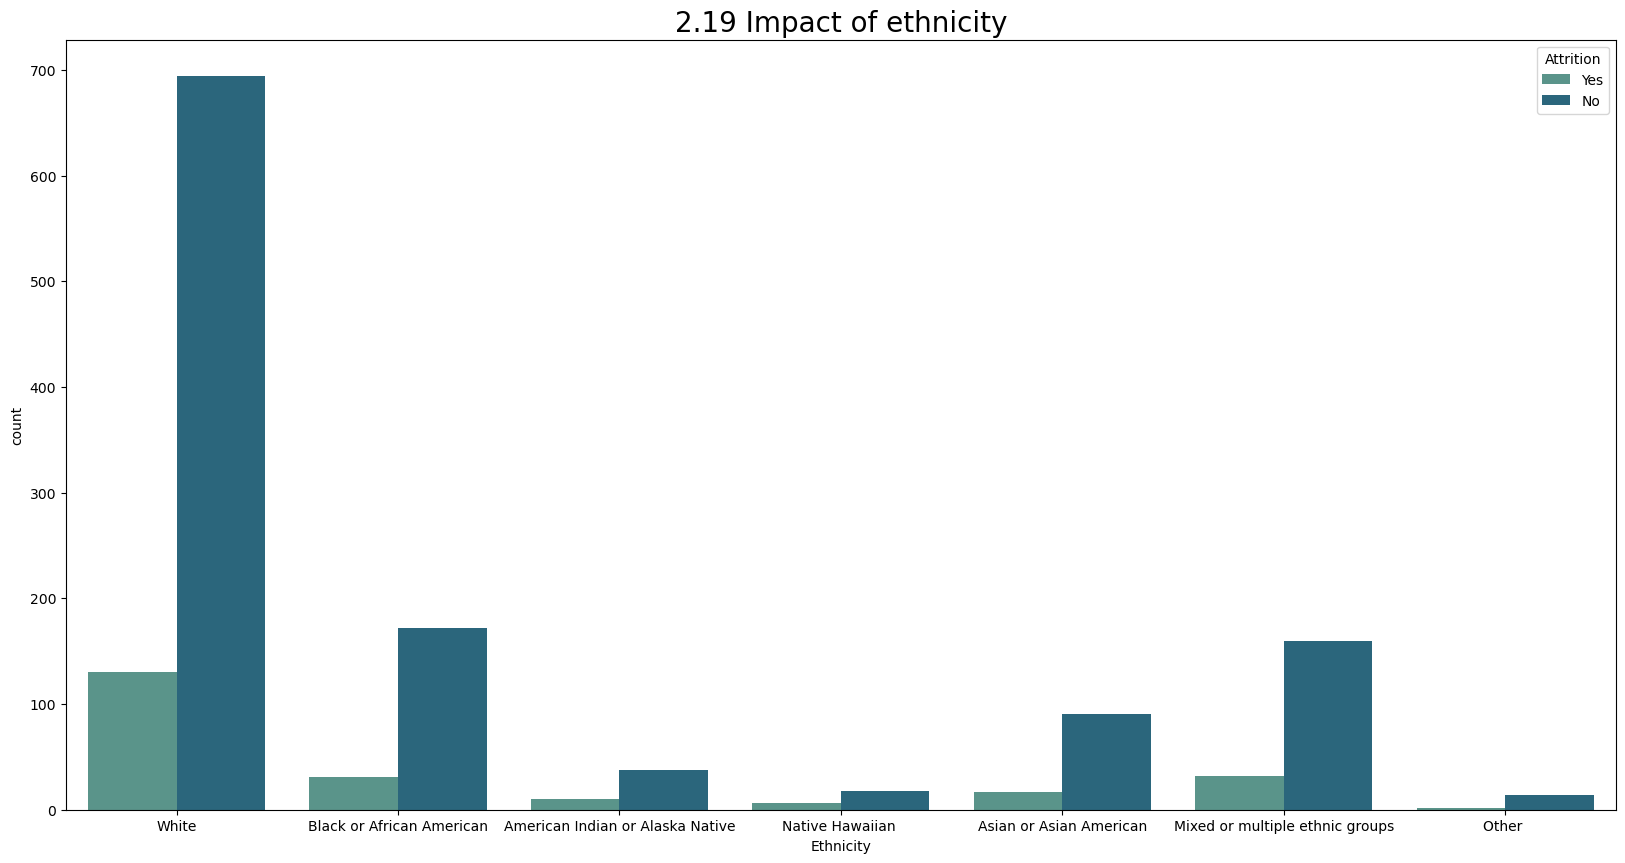

In [179]:
plt.figure(figsize=(20,10))
sns.countplot(x=employee_df.Ethnicity, hue=employee_df.Attrition , palette="crest")
plt.title("2.19 Impact of ethnicity" , fontsize = 20)
plt.show()

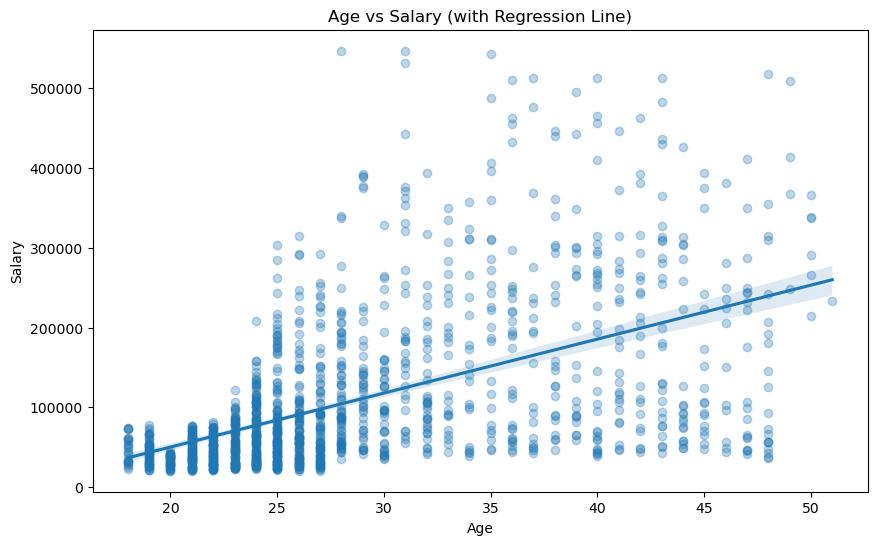

In [191]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Salary', data=employee_df, scatter_kws={'alpha':0.3})
plt.title('Age vs Salary (with Regression Line)')
plt.show()